In [1]:
import torch
from sklearn.metrics import root_mean_squared_error
from ltn_imp.automation.knowledge_base import KnowledgeBase

## Dataset Preparation

In [2]:
!poetry run poe download-reg-datasets

Poe => mkdir -p examples/classification/datasets
Poe => curl -L -o examples/regression/datasets/real_estate.csv https://raw.githubusercontent.com/tommasocarraro/LTNtorch/main/examples/datasets/real-estate.csv
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 21553  100 21553    0     0  83264      0 --:--:-- --:--:-- --:--:--     0--:--:-- --:--:-- 83538


In [3]:
def compute_rmse(model, loader):
    mean_rmse = 0.0
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient computation
        for x, y in loader:
            predictions = model(x).squeeze().detach().numpy()  # Get predictions
            y = y.detach().numpy()  # Convert y to numpy
            mean_rmse += root_mean_squared_error(y, predictions)
    model.train()  # Set the model back to training mode
    return mean_rmse / len(loader)

In [4]:
kb = KnowledgeBase("regression_config.yaml")

In [5]:
compute_rmse(kb.predicates["Regressor"], kb.loaders[0])

np.float32(41.07323)

In [6]:
kb.optimize(num_epochs=601, log_steps=100, lr=0.01)

['∀ x.((y = Regressor(x)))']
Rule Outputs:  [tensor(0.1648, grad_fn=<RsubBackward1>)]
Epoch 1/601, Train Loss: 0.8352468013763428

['∀ x.((y = Regressor(x)))']
Rule Outputs:  [tensor(0.6896, grad_fn=<RsubBackward1>)]
Epoch 101/601, Train Loss: 0.3104294538497925

['∀ x.((y = Regressor(x)))']
Rule Outputs:  [tensor(0.7066, grad_fn=<RsubBackward1>)]
Epoch 201/601, Train Loss: 0.2934473156929016

['∀ x.((y = Regressor(x)))']
Rule Outputs:  [tensor(0.7070, grad_fn=<RsubBackward1>)]
Epoch 301/601, Train Loss: 0.29302453994750977

['∀ x.((y = Regressor(x)))']
Rule Outputs:  [tensor(0.7070, grad_fn=<RsubBackward1>)]
Epoch 401/601, Train Loss: 0.29300248622894287

['∀ x.((y = Regressor(x)))']
Rule Outputs:  [tensor(0.7070, grad_fn=<RsubBackward1>)]
Epoch 501/601, Train Loss: 0.2929913401603699

['∀ x.((y = Regressor(x)))']
Rule Outputs:  [tensor(0.7070, grad_fn=<RsubBackward1>)]
Epoch 601/601, Train Loss: 0.2929799556732178



In [7]:
compute_rmse(kb.predicates["Regressor"], kb.loaders[0])

np.float32(12.402863)

## Computation Graph

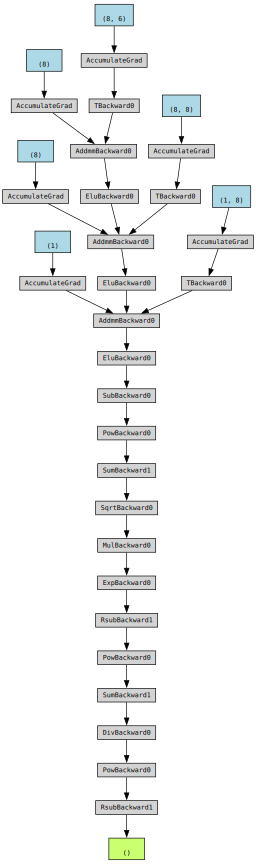

In [8]:
batch = next(iter(kb.loaders[0]))

var_mapping = {}

kb.partition_data(var_mapping,batch, kb.loaders[0])

kb.rules[0].comp_graph(var_mapping)